In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

## pd.get_dummies

In [27]:
df = pd.read_csv("data1.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robbinsville,2600,575000


<AxesSubplot:xlabel='area', ylabel='price'>

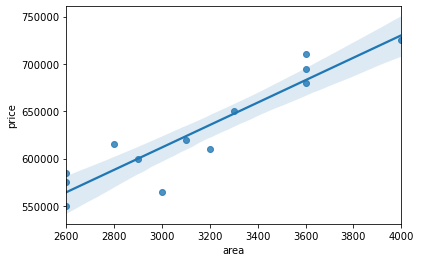

In [33]:
sns.regplot(x=df['area'], y= df['price'],)

In [8]:
dummies = pd.get_dummies(data = df['town'])
dummies

# Here the dummies are created for all categories in town. But while model building,
#it can lead to dummy variable trap and multi co - linearity... which is un desired
#(i.e. when one variable derived from other variables, it is called multi co - linearity)

# So in further steps, any one of the town category will be removed

,monroe township,robbinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [9]:
merged = pd.concat([df, dummies], axis = 'columns')
merged

,town,area,price,monroe township,robbinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robbinsville,2600,575000,0,1,0


In [14]:
# dropping town and anyone of town dummy column
final = merged.drop(['town', 'west windsor'], axis = 'columns')  #axis = 1 also gives same result
final

,area,price,monroe township,robbinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [ ]:
# All of above steps (getting dummy variables and removing dummy variable trap) can be achieved in 1 step 

In [15]:
final = pd.get_dummies(df, drop_first = True)
final

,area,price,town_robbinsville,town_west windsor
0,2600,550000,0,0
1,3000,565000,0,0
2,3200,610000,0,0
3,3600,680000,0,0
4,4000,725000,0,0
5,2600,585000,0,1
6,2800,615000,0,1
7,3300,650000,0,1
8,3600,710000,0,1
9,2600,575000,1,0


In [20]:
X = final.drop('price', axis = 1)
print(X)
print('\n')
Y = final['price']
print(Y)

    area  town_robbinsville  town_west windsor
0   2600                  0                  0
1   3000                  0                  0
2   3200                  0                  0
3   3600                  0                  0
4   4000                  0                  0
5   2600                  0                  1
6   2800                  0                  1
7   3300                  0                  1
8   3600                  0                  1
9   2600                  1                  0
10  2900                  1                  0
11  3100                  1                  0
12  3600                  1                  0


0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64


In [22]:
model_d = LinearRegression(fit_intercept = True)
model_d.fit(X, Y)

LinearRegression()

In [24]:
# price of 2800 sq.ft home in robinsville
model_d.predict([[2800,1,0]])

array([590775.63964739])

In [25]:
# price of 3400 sq.ft home in west windsor
model_d.predict([[3400,0,1]])

array([681241.6684584])

In [26]:
# price of 3000 sq.ft home in monroe township
model_d.predict([[3000,0,0]])

array([590468.71640507])

## The above objctive of getting dummy variables can also be achieved by One hot encoder

### For Ordinal Encoding... 
from sklearn.preprocessing import OrdinalEncoder
